In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [5]:
train = pd.read_csv('train.csv')
train.head()

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,train_0,0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,...,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
1,train_1,0,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,...,7.6421,7.7214,2.5837,10.9516,15.4305,2.0339,8.1267,8.7889,18.3560,1.9518
2,train_2,0,8.6093,-2.7457,12.0805,7.8928,10.5825,-9.0837,6.9427,14.6155,...,2.9057,9.7905,1.6704,1.6858,21.6042,3.1417,-6.5213,8.2675,14.7222,0.3965
3,train_3,0,11.0604,-2.1518,8.9522,7.1957,12.5846,-1.8361,5.8428,14.9250,...,4.4666,4.7433,0.7178,1.4214,23.0347,-1.2706,-2.9275,10.2922,17.9697,-8.9996
4,train_4,0,9.8369,-1.4834,12.8746,6.6375,12.2772,2.4486,5.9405,19.2514,...,-1.4905,9.5214,-0.1508,9.1942,13.2876,-1.5121,3.9267,9.5031,17.9974,-8.8104


In [4]:
test = pd.read_csv('test.csv')
test.head()

,ID_code,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,test_0,11.0656,7.7798,12.9536,9.4292,11.4327,-2.3805,5.8493,18.2675,2.1337,...,-2.1556,11.8495,-1.4300,2.4508,13.7112,2.4669,4.3654,10.7200,15.4722,-8.7197
1,test_1,8.5304,1.2543,11.3047,5.1858,9.1974,-4.0117,6.0196,18.6316,-4.4131,...,10.6165,8.8349,0.9403,10.1282,15.5765,0.4773,-1.4852,9.8714,19.1293,-20.9760
2,test_2,5.4827,-10.3581,10.1407,7.0479,10.2628,9.8052,4.8950,20.2537,1.5233,...,-0.7484,10.9935,1.9803,2.1800,12.9813,2.1281,-7.1086,7.0618,19.8956,-23.1794
3,test_3,8.5374,-1.3222,12.0220,6.5749,8.8458,3.1744,4.9397,20.5660,3.3755,...,9.5702,9.0766,1.6580,3.5813,15.1874,3.1656,3.9567,9.2295,13.0168,-4.2108
4,test_4,11.7058,-0.1327,14.1295,7.7506,9.1035,-8.5848,6.8595,10.6048,2.9890,...,4.2259,9.1723,1.2835,3.3778,19.5542,-0.2860,-5.1612,7.2882,13.9260,-9.1846


In [6]:
##shape of the train and test sets
print('Train:', train.shape)
print('Test:', test.shape)

Train: (200000, 202)
Test: (200000, 201)


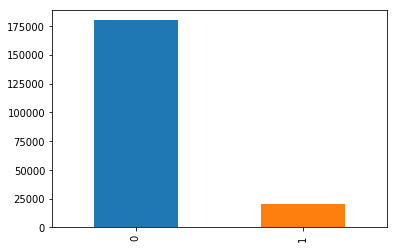

In [18]:
#target variable counts
train['target'].value_counts().plot.bar()

#### Modeling Pipelines - PCA, then try Logistic, Random Forest, Light GBM

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import lightgbm as lgb


In [10]:
test_y = test['ID_code']
test_x = test.drop(['ID_code'],axis= 1)
X = train.drop(['ID_code','target'],axis= 1)  
y = train['target'] 

##shape of the train and test sets
print('Train:', test_y.shape)
print('Test:', test_x.shape)
print('Train:', X.shape)
print('Test:', y.shape)

Train: (200000,)
Test: (200000, 200)
Train: (200000, 200)
Test: (200000,)


In [13]:
# Splitting the dataset into the Training set and Test set


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

### PCA

In [14]:
sc = StandardScaler()  
X_train_pca = sc.fit_transform(X_train)  
X_test_pca = sc.transform(X_test)  

In [15]:
from sklearn.decomposition import PCA
pca = PCA()  
X_train_pca = pca.fit_transform(X_train)  
X_test_pca = pca.transform(X_test) 

In [16]:
explained_variance = pca.explained_variance_ratio_ 

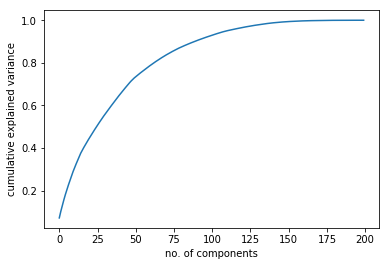

In [17]:
plt.plot(np.cumsum(explained_variance))
plt.xlabel('no. of components')
plt.ylabel('cumulative explained variance');

### Explains that PCA can't be implemented as a large number of features explains the variance among the variables 

In [ ]:
##Using Light GBM as the datasets is large 

In [108]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [300]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()  
X_train = sc.fit_transform(X_train)  
X_test = sc.transform(X_test)  

In [177]:

d_train = lgb.Dataset(X_train, label=y_train)
d_test = lgb.Dataset(X_test, label=y_test)
params = {}
params['learning_rate'] = 0.01
params['max_bin'] = 501
params['boosting_type'] = 'gbdt'
params['objective'] = 'binary'
params['metric'] = 'auc'
params['sub_feature'] = 0.5
params['num_leaves'] = 63
params['num_trees']: 100
params['num_iteration']: 500 # default=100
clf = lgb.train(params, d_train,     
                        num_boost_round=800, # may be redundant with params#num_iteration
                        valid_sets=d_test,
                        early_stopping_rounds=100,
                        verbose_eval=100,) # logs every 100 trees)

Training until validation scores don't improve for 100 rounds.
[100]	valid_0's auc: 0.800331
[200]	valid_0's auc: 0.824701
[300]	valid_0's auc: 0.840075
[400]	valid_0's auc: 0.850384
[500]	valid_0's auc: 0.858131
[600]	valid_0's auc: 0.863914
[700]	valid_0's auc: 0.868337
[800]	valid_0's auc: 0.872201
Did not meet early stopping. Best iteration is:
[800]	valid_0's auc: 0.872201


In [278]:
###Final Dataset Prediction 
y_pred_test = clf.predict(test_x,num_iteration=clf.best_iteration)
y_pred_test

array([0.96611567, 0.94712971, 0.95987831, ..., 0.8564337 , 0.9335458 ,
       0.93594468])

In [273]:
submission_file = test[['ID_code']]
submission_file['target'] = y_pred_test

E:\Anaconda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [272]:
submission_file.head()

NameError: name 'submission_file' is not defined

In [205]:
# Create the Submission File using logistic regression model
submission_file.to_csv('lightgbm.csv', index = False)

In [301]:
#custom function to build the LightGBM model.
def run_lgb(X_train, Y_train, X_test, Y_test, test_inp):
    params = {
        "objective" : "binary",
        "metric" : "auc",
        "num_leaves" : 1000,
        "learning_rate" : 0.01,
        "bagging_fraction" : 0.8,
        "feature_fraction" : 0.8,
        "bagging_freq" : 5,
        "reg_alpha" : 1.728910519108444,
        "reg_lambda" : 4.9847051755586085,
        "random_state" : 42,
        "bagging_seed" : 2019,
        "verbosity" : -1,
        "max_depth": 18,
        "min_child_samples":100
       # ,"boosting":"rf"
    }
    
    lgtrain = lgb.Dataset(X_train, label=y_train)
    lgval = lgb.Dataset(X_test, label=y_test)
    evals_result = {}
    model = lgb.train(params, lgtrain, 1500, valid_sets=[lgval], 
                      early_stopping_rounds=50, verbose_eval=50, evals_result=evals_result)
    
    pred_test_y = model.predict(test_inp, num_iteration=model.best_iteration)
    return pred_test_y, model, evals_result


In [302]:

# Training the model #
pred_test, model, evals_result = run_lgb(X_train, y_train, X_test, y_test, test_x)

Training until validation scores don't improve for 50 rounds.
[50]	valid_0's auc: 0.796837
[100]	valid_0's auc: 0.817667
[150]	valid_0's auc: 0.833391
[200]	valid_0's auc: 0.844248
[250]	valid_0's auc: 0.851859
[300]	valid_0's auc: 0.857609
[350]	valid_0's auc: 0.862072
[400]	valid_0's auc: 0.865596
[450]	valid_0's auc: 0.868526
[500]	valid_0's auc: 0.871108
[550]	valid_0's auc: 0.873039
[600]	valid_0's auc: 0.874754
[650]	valid_0's auc: 0.876256
[700]	valid_0's auc: 0.877531
[750]	valid_0's auc: 0.878681
[800]	valid_0's auc: 0.879671
[850]	valid_0's auc: 0.880641
[900]	valid_0's auc: 0.881451
[950]	valid_0's auc: 0.882249
[1000]	valid_0's auc: 0.882888
[1050]	valid_0's auc: 0.883381
[1100]	valid_0's auc: 0.883748
[1150]	valid_0's auc: 0.884173
[1200]	valid_0's auc: 0.88444
[1250]	valid_0's auc: 0.884745
[1300]	valid_0's auc: 0.885059
[1350]	valid_0's auc: 0.885334
[1400]	valid_0's auc: 0.885614
[1450]	valid_0's auc: 0.885878
[1500]	valid_0's auc: 0.886073
Did not meet early stopping. 

In [1]:
pred_test

NameError: name 'pred_test' is not defined

In [284]:
# Extract feature importances
features = list(test_x.columns)
feature_importance_values = model.feature_importances_
feature_importance_values = model.feature_importance()
feature_importances = pd.DataFrame({'feature': features, 'importance': feature_importance_values})
feature_importances.sort_values(by='importance', ascending=False).head(n=10)

ValueError: arrays must all be same length

In [280]:
submission_file = test[['ID_code']]
submission_file['target'] = pred_test
# Create the Submission File using logistic regression model
submission_file.to_csv('lightgbm_v2.csv', index = False)

E:\Anaconda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
